### numpy

In [5]:
import numpy as np

In [53]:
array = np.array([[1,2,3,4], [1,2,3,4]])
array

array([[1, 2, 3, 4],
       [1, 2, 3, 4]])

In [57]:
array.shape

(2, 4)

In [49]:
hoge = np.arange(0,11)

In [51]:
hoge[:] = 99

In [52]:
hoge

array([99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99])

### pandas

In [88]:
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
obj = Series([1,2,3])

In [61]:
obj.values

array([1, 2, 3])

In [62]:
obj.index

Int64Index([0, 1, 2], dtype='int64')

In [64]:
score = pd.read_clipboard()

In [65]:
score

,Rank,Team,Won,Lost,Tied,Pct.,First,NFL,Season,Total,Games,Division
0,1,Chicago,Bears,741,555,42,0.570,1920.000,"1,338",NFC,North,NaN
1,2,Dallas,Cowboys,480,364,6,0.568,1960.000,850,NFC,East,NaN
2,3,Green,Bay,Packers,720,547,37.000,0.566,1921,"1,304",NFC,North
3,4,Miami,Dolphins,429,335,4,0.561,1966.000,768,AFC,East,NaN
4,5,New,England,Patriots,462,381,9.000,0.548,1960,852,AFC,East
5,6,San,Francisco,49ers,520,436,14.000,0.543,1950,970,NFC,West
6,7,Baltimore,Ravens,173,146,1,0.542,1996.000,320,AFC,North,NaN
7,8,Minnesota,Vikings,449,379,10,0.542,1961.000,838,NFC,North,NaN


In [66]:
score.columns

Index(['Rank', 'Team', 'Won', 'Lost', 'Tied', 'Pct.', 'First', 'NFL', 'Season',
       'Total', 'Games', 'Division'],
      dtype='object')

### データ解析(セクション9)

In [115]:
titanic = pd.read_csv("/Users/fujikzy/Desktop/train.csv")

In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


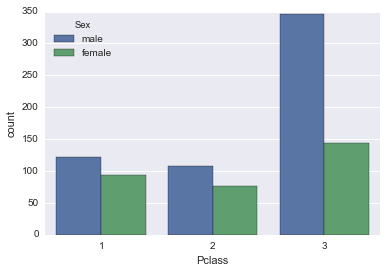

In [93]:
sns.countplot("Pclass",data=titanic, hue = "Sex")

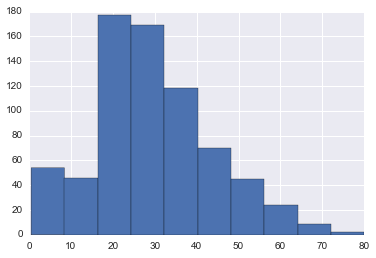

In [113]:
titanic["Age"].hist()

In [126]:
# Null含めてcount可能
from collections import Counter
Counter(titanic.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [122]:
titanic["Sex"].value_counts() #使える

male      577
female    314
dtype: int64

/Users/fujikzy/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


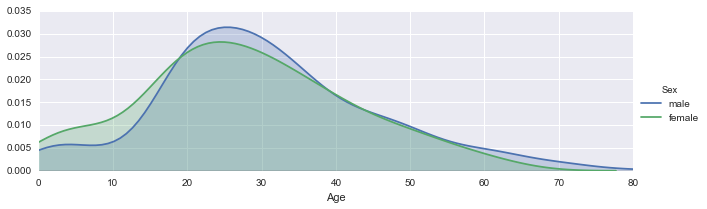

In [125]:
fig = sns.FacetGrid(titanic, hue = "Sex", aspect=3)
fig.map(sns.kdeplot, "Age", shade=True)
oldest = titanic["Age"].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

In [130]:
# 数字を、文字列に変換します。
titanic["Survivor"] = titanic.Survived.map({0:"no",1:"yes"})

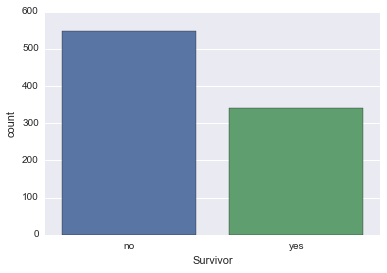

In [131]:
sns.countplot("Survivor",data = titanic)

### 機械学習入門

###　線形回帰

In [177]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
boston = load_boston()

In [150]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df["Price"] = boston.target

In [146]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


/Users/fujikzy/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


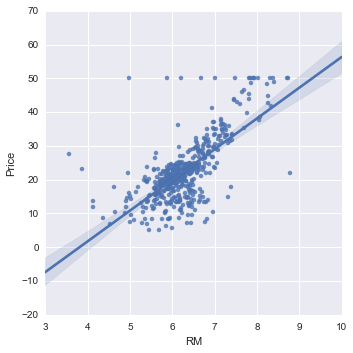

In [151]:
sns.lmplot("RM", "Price", data = boston_df)

In [160]:
lreg = LinearRegression()

In [163]:
X_multi = boston_df.drop("Price",1)

In [165]:
Y_target = boston_df.Price

In [166]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [167]:
lreg.intercept_

36.49110328036155

In [168]:
len(lreg.coef_)

13

In [169]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

In [172]:
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

In [173]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### ロジスティック回帰

In [178]:
df = sm.datasets.fair.load_pandas().data

In [180]:
def check(x):
    if x != -0:
        return 1
    else:
        return 0

In [181]:
df["Had_Affair"] = df["affairs"].apply(check)

In [185]:
df.groupby("Had_Affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


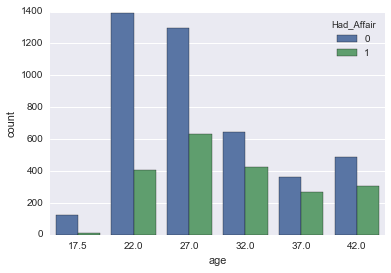

In [186]:
sns.countplot("age", data = df.sort("age"), hue="Had_Affair")

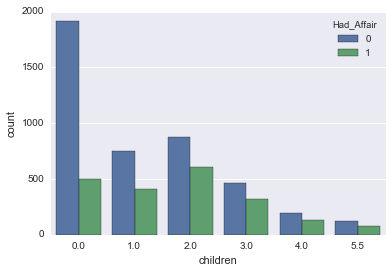

In [189]:
sns.countplot("children", data = df.sort("children"), hue="Had_Affair")

In [190]:
occ_dummies = pd.get_dummies(df.occupation)

In [192]:
hus_occ_dummies = pd.get_dummies(df.occupation_husb)

In [194]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [195]:
X = df.drop(["occupation", "occupation_husb", "Had_Affair"], axis=1)

In [197]:
dummies = pd.concat([occ_dummies,hus_occ_dummies], axis=1)

In [198]:
X = pd.concat([X, dummies], axis=1)

In [200]:
Y = df.Had_Affair

In [6]:
from graphviz import Digraph
import pydot
from sklearn.externals.six import StringIO
import pydotplus

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
#決定木のクラスの読み込み
from sklearn import tree
#木の深さを指定し、モデルを生成
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data, iris.target)

In [23]:
#dot形式でエクスポート
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, class_names=iris.target_names,feature_names=iris.feature_names)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
#グラフ化
graph[0].write_pdf("graph.pdf")

True